# SPAM EMAIL DETECTION SYSTEM USING NLP AND MACHINE LEARNING
This Spam Email Detection System uses Natural Language Processing (NLP) and Machine Learning (ML) techniques to intelligently classify emails as spam or legitimate (ham). By analyzing the textual content, patterns, and other features of emails, the system can effectively filter unwanted messages, enhancing email usability and safeguarding users from potential threats.

### **Libraries**

In [127]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ikool\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### **1. Data Loading**
Load the dataset and show its info and statistics

In [128]:
# Load the dataset
dataset = pd.read_csv('emails.csv')
dataset.shape

(5728, 2)

In [129]:
# Show dataset head (first 5 records)
dataset.head() 

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [130]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [131]:
# Show dataset statistics
dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


##### **2. Data Visualization**
Visualize dataset features frequencies to get some insights

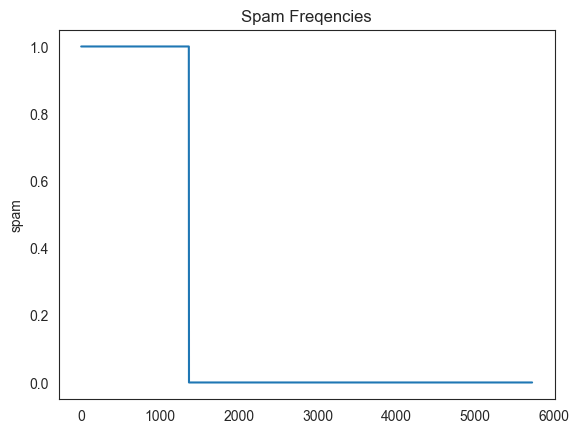

In [132]:
# Visualize spam  frequenices
plt.figure(dpi=100)
sns.lineplot(dataset['spam'])
plt.title("Spam Freqencies")
plt.show()

##### **3. Data Cleaning**
Handling missing values and check for duplicates 

In [133]:
# Check for missing data for each column 
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [134]:
# Check for duplicates and remove them 
dataset.drop_duplicates(inplace=True)

In [135]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [136]:
X=dataset['text']


In [137]:
X.shape

(5695,)

In [138]:
# Fit the CountVectorizer to data
cv=CountVectorizer()
X=cv.fit_transform(X)

##### **4. Data Splitting**
Split the dataset into training and testing sets

In [139]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)

##  Model
In this phase we will create and train a multinomial naive bayes model 

In [140]:
# Model creation
model = MultinomialNB()

In [141]:
# Model training
model.fit(X_train, y_train)

MultinomialNB()

In [142]:
# Model saving
dump(model, open("model.pkl", 'wb'))

In [143]:
# Model predictions on test set
y_pred = model.predict(X_test)

In [144]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.20983318700614

In [145]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       870\n           1       0.97      1.00      0.98       269\n\n    accuracy                           0.99      1139\n   macro avg       0.98      0.99      0.99      1139\nweighted avg       0.99      0.99      0.99      1139\n'

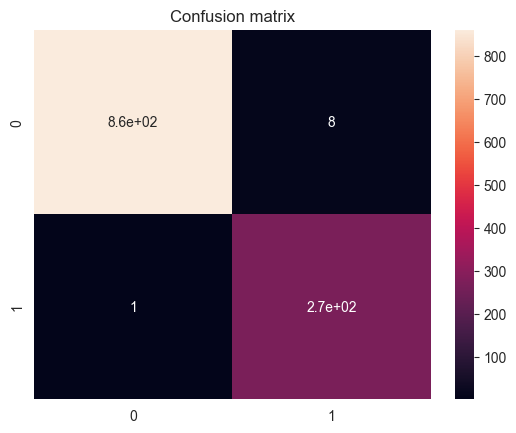

In [146]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [147]:
corpus = [
    "You have won a lottery",
    "This is a spam message",
    "Hello, how are you?",
    "Win cash prize now"
]
labels = [1, 1, 0, 1]  # 1 = spam, 0 = not spam

# fit the vectorizer
X_train = cv.fit_transform(corpus).toarray()

# Train the model
model = MultinomialNB()
model.fit(X_train, labels)

# (Optional) Save vectorizer and model for future use
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(cv, f)
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Step 2: Reuse the same vectorizer and model for predictions
# (Optional) Load vectorizer and model
with open("vectorizer.pkl", "rb") as f:
    cv = pickle.load(f)
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Predict on new data
msg = "You Won 500$"
data = [msg]
vect = cv.transform(data).toarray()  # Ensure the same vectorizer is used
my_prediction = model.predict(vect)

print("Prediction:", my_prediction) 

Prediction: [1]


In [148]:
pickle.dump(model, open('spam.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))

In [149]:
pickle.dump(cv, open('vec.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))

# HAPPY CODING!